# 1. Import Data & Python Packages

In [337]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [338]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [339]:
data = pd.concat([train_data,test_data],axis='rows')

In [340]:
data.shape

(1309, 12)

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [342]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# 2. Data Quality & Missing Value Assessment

In [343]:
data['Age'].isna().sum()

263

In [344]:
data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

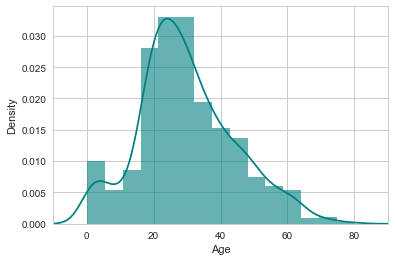

In [345]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

In [346]:
data['Age'].mean()

29.881137667304014

In [347]:
data['Age'].median()

28.0

In [348]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [349]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [350]:
data['Cabin'].isna().sum()/(data['Cabin'].shape[0])*100

77.46371275783041

In [351]:
data.drop(columns=['Cabin','PassengerId','Ticket'],inplace = True)

In [352]:
data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0


In [353]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

S    916
C    270
Q    123
Name: Embarked, dtype: int64


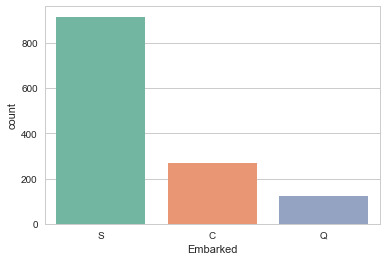

In [354]:
print(data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

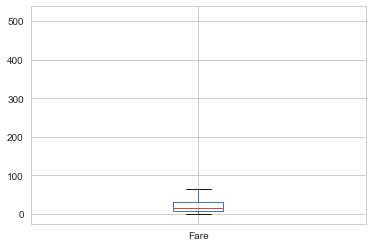

In [355]:
%matplotlib inline
data['Fare'].plot(kind = 'box')

In [356]:
data['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

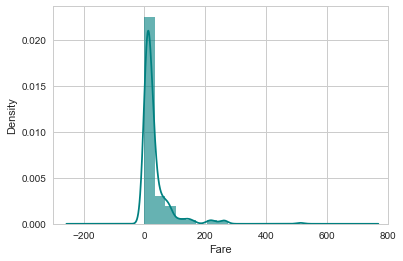

In [357]:
ax = data["Fare"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Fare"].plot(kind='density', color='teal')
ax.set(xlabel='Fare')
plt.xlim(-300,800)
plt.show()

In [358]:
data['Fare'].fillna(data['Fare'].mean(),inplace = True)

In [359]:
data['TravelAlone']=np.where((data["SibSp"]+data["Parch"])>0, 0, 1)

In [360]:
data.drop(columns=['Parch','SibSp'],inplace = True)

In [361]:
data['Pclass'].isna().sum()

0

In [362]:
data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,TravelAlone
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,1


In [363]:
data['Sex'].isna().sum()

0

In [364]:
data.shape

(1309, 8)

In [373]:
data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,TravelAlone,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,0,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,0,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,1,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,0,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,1,Mr


In [371]:
data['Title']=data['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [380]:
data['Title'].replace({'Don':'Other','Rev':'Other','Dr':'Other','Mme':'Mrs','Ms':'Miss','Mlle':'Miss',
                      'Major':'Other','Lady':'Other','Sir':'Other','Col':'Other','Capt':'Other','the Countess':'Other'
                      ,'Jonkheer':'Other','Dona':'Other'},inplace = True)

In [386]:
data.drop(columns='Name',inplace = True)

In [387]:
catogorical_value = pd.get_dummies(data.select_dtypes(exclude=np.number))

In [388]:
catogorical_value

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,0
2,0,0,1,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,1,0
4,0,0,1,0,1,0,0,1,0,0
5,0,1,0,0,1,0,0,1,0,0
6,0,0,1,0,1,0,0,1,0,0
7,0,0,1,0,1,1,0,0,0,0
8,0,0,1,1,0,0,0,0,1,0
9,1,0,0,1,0,0,0,0,1,0


In [389]:
data_preprocessed = pd.concat([data.select_dtypes(include=np.number),catogorical_value],axis='columns')

In [390]:
data_preprocessed.head()

,Age,Fare,Pclass,Survived,TravelAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,22.0,7.2500,3,0.0,0,0,0,1,0,1,0,0,1,0,0
1,38.0,71.2833,1,1.0,0,1,0,0,1,0,0,0,0,1,0
2,26.0,7.9250,3,1.0,1,0,0,1,1,0,0,1,0,0,0
3,35.0,53.1000,1,1.0,0,0,0,1,1,0,0,0,0,1,0
4,35.0,8.0500,3,0.0,1,0,0,1,0,1,0,0,1,0,0


In [391]:
train_data_preprocessed = data_preprocessed[data_preprocessed['Survived'].notna()]
test_data_preprocessed = data_preprocessed[data_preprocessed['Survived'].isna()]

In [392]:
x_train = train_data_preprocessed.drop(columns='Survived')
y_train = train_data_preprocessed['Survived']
x_test = test_data_preprocessed.drop(columns='Survived')

In [393]:
x_train.head()

,Age,Fare,Pclass,TravelAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,22.0,7.2500,3,0,0,0,1,0,1,0,0,1,0,0
1,38.0,71.2833,1,0,1,0,0,1,0,0,0,0,1,0
2,26.0,7.9250,3,1,0,0,1,1,0,0,1,0,0,0
3,35.0,53.1000,1,0,0,0,1,1,0,0,0,0,1,0
4,35.0,8.0500,3,1,0,0,1,0,1,0,0,1,0,0


In [394]:
def model_fit(model,x_train,y_train,x_test,fileName):
    model.fit(x_train,y_train);
    model.intercept_
    model.coef_
    model.predict_proba(x_train)
    y_train_predicted=model.predict(x_train);
    print("Root Mean Square Error ",np.sqrt(mean_squared_error(y_train,y_train_predicted)))
    print("Confusion Matrix :",confusion_matrix(y_train,y_train_predicted ))
    print(" Test Accuracy :",accuracy_score(y_train,y_train_predicted))
    print(" Test Recall :",recall_score(y_train,y_train_predicted))
    print(classification_report(y_train,y_train_predicted))
    y_test_predicted = model.predict(x_test);
    y_test_dataframe = pd.DataFrame(y_test_predicted,columns=["Survived"])
    result = pd.concat([test_data[['PassengerId']],y_test_dataframe],axis=1)
    result.to_csv(fileName,index=False)

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

In [402]:
logistic = LogisticRegression()

In [403]:
model_fit(logistic,x_train,y_train,x_test,"Logistic-Regression.csv")

Root Mean Square Error  0.4342259648526197
Confusion Matrix : [[469  80]
 [ 88 254]]
 Test Accuracy : 0.8114478114478114
 Test Recall : 0.7426900584795322
             precision    recall  f1-score   support

        0.0       0.84      0.85      0.85       549
        1.0       0.76      0.74      0.75       342

avg / total       0.81      0.81      0.81       891



In [404]:
lasso = LogisticRegression(penalty='l1')

In [405]:
model_fit(logistic,x_train,y_train,x_test,"Lasso-Regression.csv")

Root Mean Square Error  0.4342259648526197
Confusion Matrix : [[469  80]
 [ 88 254]]
 Test Accuracy : 0.8114478114478114
 Test Recall : 0.7426900584795322
             precision    recall  f1-score   support

        0.0       0.84      0.85      0.85       549
        1.0       0.76      0.74      0.75       342

avg / total       0.81      0.81      0.81       891



In [406]:
Ridge = LogisticRegression(penalty='l2')

In [407]:
model_fit(logistic,x_train,y_train,x_test,"Ridge-Regression.csv")

Root Mean Square Error  0.4342259648526197
Confusion Matrix : [[469  80]
 [ 88 254]]
 Test Accuracy : 0.8114478114478114
 Test Recall : 0.7426900584795322
             precision    recall  f1-score   support

        0.0       0.84      0.85      0.85       549
        1.0       0.76      0.74      0.75       342

avg / total       0.81      0.81      0.81       891

